In [7]:
#Imports:
import os
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

#DIRECTORIES:
datadir = 'data/'
figdir = 'figures/'

273.448
0.461019
-14.5859


<ipython-input-38-586ff1872fca>:30: RuntimeWarning: invalid value encountered in log10
  lgPA = np.log10(PA)


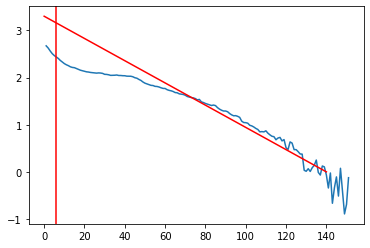

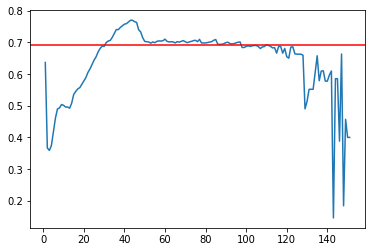

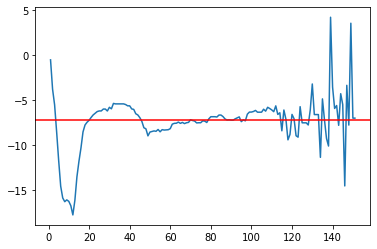

In [38]:
#Importing data:
data = np.loadtxt(datadir+'MCG-01-10-015_i.txt',skiprows=2)
r = np.array(data[:,0])
lgr = np.log10(r)

    #Intensity:
I = data[:,1]
lgI = np.log10(I)
plt.figure()
plt.plot(r,lgI)
plt.plot([0,140],[3.3,0],'r')
plt.axvline(6, color='r', linestyle='-')
plt.savefig(figdir+'r_I.png',bbox_inches='tight',dpi=300)
r = r.flatten().tolist()
pos = r.index(6)
Io = I[pos]
print(Io)

    #Ellipticity:
el = data[:,3]
elo = el[pos]
print(elo)
plt.figure()
plt.plot(r,el)
plt.axhline(y=0.69, color='r', linestyle='-')
plt.savefig(figdir+'r_el.png',bbox_inches='tight',dpi=300)
    
    #PA:
PA = data[:,5]
lgPA = np.log10(PA)
PAo = PA[pos]
print(PAo)
plt.figure()
plt.plot(r,PA)
plt.axhline(y=-7.2, color='r', linestyle='-')
plt.savefig(figdir+'r_pa.png',bbox_inches='tight',dpi=300)

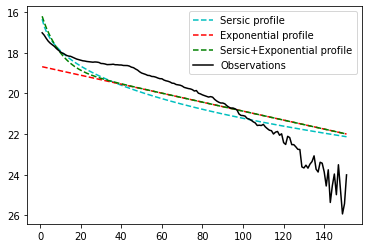

In [39]:
#REPRESENTING PROFILES:
    #Common variables:
zcal = 23.700399
r = np.array(data[:,0])

plt.figure()

    #Function defining:
def mu_exp(x,zcal,Ie,h):
    i = Ie*np.exp(-x/h)
    m = -2.5*np.log10(i)+zcal
    m = np.array(m,dtype='float64')
    return m,i

def mu_sers(x,zcal,Ie,bn,Re,n):
    i = Ie*np.exp(-bn*((x/Re)**(1/n)-1))
    m = -2.5*np.log10(i)+zcal
    m = np.array(m,dtype='float64')
    return m,i

    #Sersic data:
n = 3.04409
bn = 2*n-0.327
Ie = 9.76698
Re = 100
M_sers,I_sers = mu_sers(r,zcal,Ie,bn,Re,n)

    #Exp data:
h = 30.058
Ie = 218.566
M_exp,I_exp = mu_exp(r,zcal,Ie,h)

    #Combined:
n = 1.30809
bn = 2*n-0.327
Ie = 141.177
Re = 8.5649
M_serss,I_serss = mu_sers(r,zcal,Ie,bn,Re,n)

Ie = 103.144
h = 49.1986
M_exp,I_exp = mu_exp(r,zcal,Ie,h)

I_tot = I_exp+I_serss
M_tot = -2.5*np.log10(I_tot)+zcal
    
    #Data:
I = np.array(data[:,1])
M = -2.5*np.log10(I)+zcal

    #Plotting:
plt.plot(r,M_sers,'c--',label='Sersic profile')
plt.plot(r,M_exp,'r--',label='Exponential profile')
plt.plot(r,M_tot,'g--',label='Sersic+Exponential profile')
plt.plot(r,M,'k-',label='Observations')
plt.gca().invert_yaxis()
plt.legend()
plt.savefig(figdir+'mu_exp_sersic.png',bbox_inches='tight',dpi=300)

In [40]:
1.01178/0.369

2.741951219512195